## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

pd.options.display.max_columns = None

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
url = "https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv"
data = pd.read_csv(url)
data

status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
..                                          ...       ...   
995                         no checking account        24   
996                         no checking account        24   
997  ... >= 200 DM / salary for at least 1 year        21   
998                                  ... < 0 DM        12   
999                         no checking account        30   

                                  credit_history              purpose  amount  \
0        all credits at this bank paid back duly           car (used)    1049   
1        all credits at this bank paid back duly               others    2799   
2    no credits taken/all credits paid back duly           retraining     841   
3        all credits at this bank paid back duly               others    2122   
4        all credits at this bank paid back duly               others    2171   
..                                           ...                  ...     ...   
995  no credits taken/all credits paid back duly  furniture/equipment    1987   
996  no credits taken/all credits paid back duly               others    2303   
997      all credits at this bank paid back duly               others   12680   
998  no credits taken/all credits paid back duly  furniture/equipment    6468   
999  no credits taken/all credits paid back duly           car (used)    6350   

                        savings employment_duration installment_rate  \
0    unknown/no savings account              < 1 yr             < 20   
1    unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
2                 ... <  100 DM    4 <= ... < 7 yrs   25 <= ... < 35   
3    unknown/no savings account    1 <= ... < 4 yrs   20 <= ... < 25   
4    unknown/no savings account    1 <= ... < 4 yrs             < 20   
..                          ...                 ...              ...   
995  unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
996  unknown/no savings account            >= 7 yrs             < 20   
997              ... >= 1000 DM            >= 7 yrs             < 20   
998              ... >= 1000 DM          unemployed   25 <= ... < 35   
999              ... >= 1000 DM            >= 7 yrs             < 20   

                      personal_status_sex other_debtors present_residence  \
0    female : non-single or male : single          none          >= 7 yrs   
1                  male : married/widowed          none  1 <= ... < 4 yrs   
2    female : non-single or male : single          none          >= 7 yrs   
3                  male : married/widowed          none  1 <= ... < 4 yrs   
4                  male : married/widowed          none          >= 7 yrs   
..                                    ...           ...               ...   
995                male : married/widowed          none          >= 7 yrs   
996                male : married/widowed  co-applicant            < 1 yr   
997                male : married/widowed          none          >= 7 yrs   
998                male : married/widowed          none            < 1 yr   
999                male : married/widowed          none          >= 7 yrs   

                  property  age other_installment_plans   housing  \
0             car or other   21                    none  for free   
1    unknown / no property   36                    none  for free   
2    unknown / no property   23                    none  for free   
3    unknown / no property   39                    none  for free   
4             car or other   38                    bank      rent   
..                     ...  ...                     ...       ...   
995  unknown / no property   21                    none  for f

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
pd.DataFrame(data.isna().sum(), columns=['n/a'])

n/a
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0

In [4]:
binary = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
ordinal = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'housing']
categorical = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'job']
quantitative = ['duration', 'amount', 'age']

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [5]:
pd.DataFrame(data.groupby('purpose')['amount'].sum()).rename(columns={'amount': 'total amount'})

total amount
purpose                          
business                    98512
car (new)                  553133
car (used)                 555124
domestic appliances         60018
furniture/equipment        696552
others                     716730
radio/television            17976
repairs                    159020
retraining                 403330
vacation                    10853

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [6]:
(data[data['age'] < 30]['housing'] == 'rent').mean() * 100

66.66666666666666

In [7]:
(data[data['age'] > 40]['housing'] == 'rent').mean() * 100

68.01470588235294

### Задание 5 (0.5 балла)

У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [8]:
foreign_workers = data['foreign_worker'] == 'yes'
many_credits = data['number_credits'].isin({'4-5', '>= 6'})

(foreign_workers & many_credits).sum()

1

### Задание 6 (1 балл)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

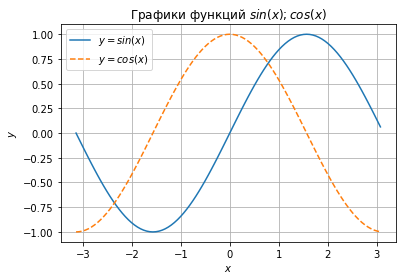

In [10]:
n = 100
a, b = -np.pi, np.pi
x = np.arange(a, b, (b - a) / n)

plt.plot(x, np.sin(x), label='$y = sin(x)$')
plt.plot(x, np.cos(x), linestyle='--', label='$y = cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()

plt.title('Графики функций $sin(x); cos(x)$')
plt.show()

_Вывод:_

$sin(x) \equiv cos(x - \frac{\pi}{2})$

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [11]:
new_index = pd.MultiIndex.from_product([
    ['good', 'bad'],
    ['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
])

counts = data.value_counts(subset=['credit_risk', 'status']).reindex(new_index)
good, bad = counts.loc['good'], counts.loc['bad']
counts

good  no checking account                           139
      ... < 0 DM                                    164
      0<= ... < 200 DM                               49
      ... >= 200 DM / salary for at least 1 year    348
bad   no checking account                           135
      ... < 0 DM                                    105
      0<= ... < 200 DM                               14
      ... >= 200 DM / salary for at least 1 year     46
dtype: int64

In [12]:
cmap = {'good': 'green', 'bad': 'red'}

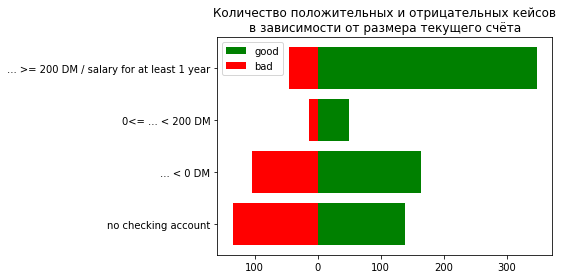

In [13]:
import matplotlib.ticker as tck

plt.barh(good.index, good, color=cmap['good'], label='good')
plt.barh(bad.index, -bad, color=cmap['bad'], label='bad')

formatter = tck.FuncFormatter(lambda x, pos: abs(int(x)))
plt.gca().xaxis.set_major_formatter(formatter)

plt.title("Количество положительных и отрицательных кейсов\nв зависимости от размера текущего счёта")
plt.legend()
plt.show()

```python3
# Не совсем, как на картинке, но довольно наглядно:

# Значения порядкового показателя status упорядочены
# Положительные и отрицательные кейсы отражены на общей оси x
```

_Вывод:_

Выплаченных кредитов значительно меньше, чем невыплаченных.  
Владельцы крупных счетов выплачивают гораздо больше кредитов, чем владельцы мелких счетов.  
Среди кредитов дебиторов, не имеющих в банке текущего счета, примерно половина невыплаченных.

### Задание 8  (0.5 балла)

In [14]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

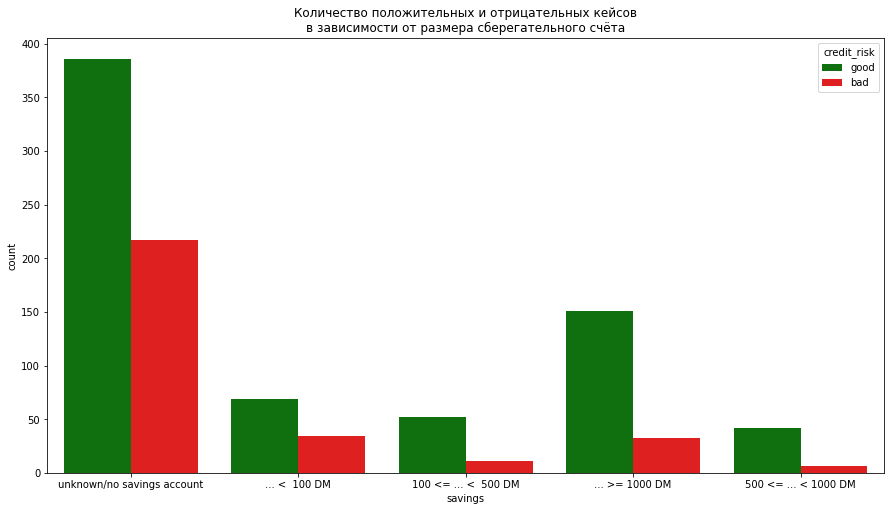

In [15]:
plt.figure(figsize=(15,8))

sns.countplot(x='savings', hue='credit_risk', data=data, palette=cmap)

plt.title("Количество положительных и отрицательных кейсов\nв зависимости от размера сберегательного счёта")
plt.show()

_Вывод:_

Большая часть дебиторов не имеет сберегательного счета в банке (или данных о нем нет).  
Дебиторы с невыплаченными кредитами имеют меньше сбережений, чем дебиторы с выплаченными кредитами.

Seaborn проще в использовании, но matplotlib позволяет более детально прорабатывать виузализацию.  
ак в предыдущей, так и в данной задаче я бы предпочел построить зеркальную гистограмму на общей оси.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

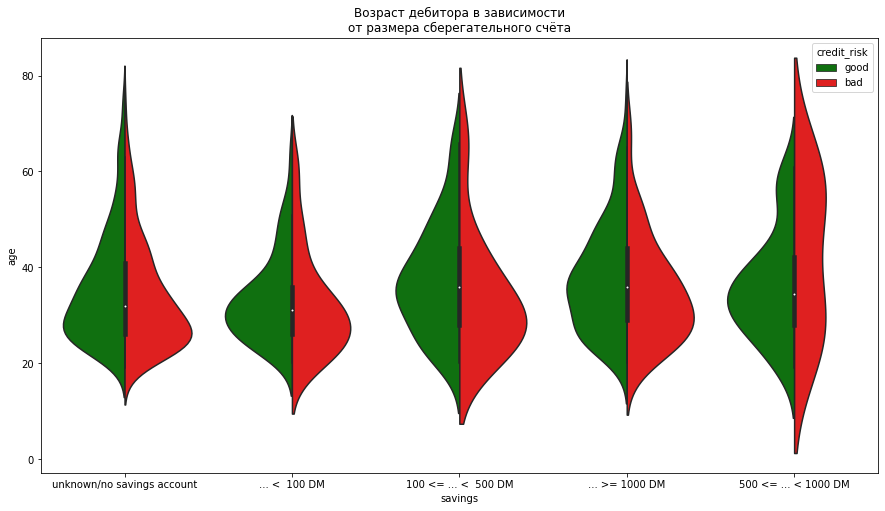

In [16]:
plt.figure(figsize=(15,8))

sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=cmap, split=True)

plt.title("Возраст дебитора в зависимости\nот размера сберегательного счёта")
plt.show()

_Вывод:_

Для группы невыплаченных кредитов дебиторов, имеющих на сберегательном счете от 500 до 1000 DM, характерно относительно равномерное распределение возраста.  
Возможно, в этой группе недостаточно наблюдений. Для остальных групп распределение больше напоминает нормальное.  
Дебиторы, не выплатившие кредит, в среднем моложе тех, кто выплатил кредит.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [17]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

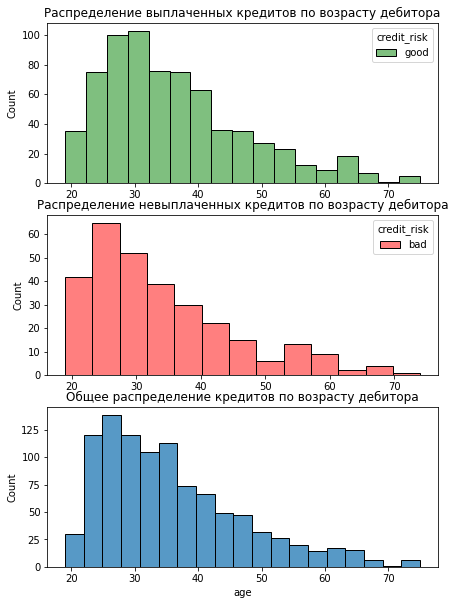

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

axes[0].set_title('Распределение выплаченных кредитов по возрасту дебитора')
sns.histplot(ax=axes[0], x='age', data=good, hue='credit_risk', palette=cmap)
axes[0].set(xlabel=None)

axes[1].set_title('Распределение невыплаченных кредитов по возрасту дебитора')
sns.histplot(ax=axes[1], x='age', data=bad, hue='credit_risk', palette=cmap)
axes[1].set(xlabel=None)

axes[2].set_title('Общее распределение кредитов по возрасту дебитора')
sns.histplot(ax=axes[2], x='age', data=data)

plt.show()

_Вывод:_

Сильной зависимости между возрастом дебитора и кредитным риском не наблюдается.  
Возрастное распределение для выплаченных, невыплаченных и всех кредитов имеет схожий характер.  
Однако, все же можно заметить, что возраст дебиторов, не выплативших кредит, в среднем, ниже.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

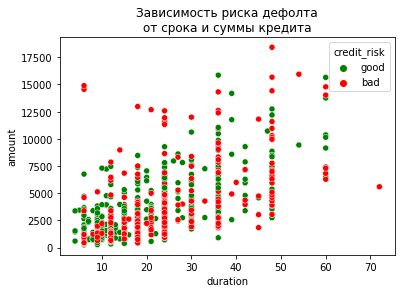

In [19]:
c = 'credit_risk'
x, y = 'duration', 'amount'

sns.scatterplot(data=data, x=x, y=y, hue=c, palette=cmap)

plt.title('''Зависимость риска дефолта
от срока и суммы кредита''')
plt.show()

_Вывод:_

Наблюдается линейная зависимость между сроком и суммой кредита с заметным количеством выбросов.  
Большая часть экстремальных наблюдений представляют собой невыплаченные кредиты.  
Среди неэкстремальных наблюдений невыплаченные кредиты в среднем имеют меньшую сумму, чем выплаченные.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

In [20]:
from matplotlib.lines import Line2D

# В mplot3d не работает автоматическое построение легенды для 3D scatterplot
# Приходится создавать Artist-заглушки и самому строить по ним легенду

def get_dummy_artist(label, color):
    return Line2D([], [], marker='o', linestyle='', color=color, label=label)

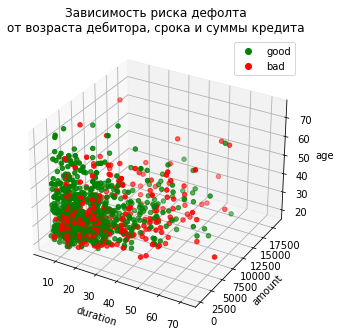

In [21]:
from mpl_toolkits.mplot3d import Axes3D

z = 'age'

ax = Axes3D(plt.figure(), xlabel=x, ylabel=y, zlabel=z)
ax.scatter(data[x], data[y], data[z], color=data[c].replace(cmap))

ax.legend(handles=[get_dummy_artist(lbl, col)
                   for lbl, col in cmap.items()])

plt.title('''Зависимость риска дефолта
от возраста дебитора, срока и суммы кредита''')
plt.show()

_Вывод:_

Зависимость между сроком и суммой кредита (см. вывод _п. 11_) видна, но засчет добавления нового измерения, интерпретируется хуже.  
Диаграмма отражает то же распределение по возрасту, что и гистограммы в _п. 10_.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [22]:
mappers = {
    'housing': {'for free': 0,
                'rent'    : 1,
                'own'     : 2},
    
    'number_credits': {'1'   : 0,
                       '2-3' : 1,
                       '4-5' : 2,
                       '>= 6': 3},
    
    'installment_rate': {'< 20'          : 0,
                         '20 <= ... < 25': 1,
                         '25 <= ... < 35': 2,
                         '>= 35'         : 3},
    
    'savings': {'unknown/no savings account': 0,
                '... <  100 DM'             : 1,
                '100 <= ... <  500 DM'      : 2,
                '500 <= ... < 1000 DM'      : 3,
                '... >= 1000 DM'            : 4},
    
    'present_residence': {'< 1 yr'          : 0,
                          '1 <= ... < 4 yrs': 1,
                          '4 <= ... < 7 yrs': 2,
                          '>= 7 yrs'        : 3},
    
    'employment_duration': {'unemployed'      : 0,
                            '< 1 yr'          : 1,
                            '1 <= ... < 4 yrs': 2,
                            '4 <= ... < 7 yrs': 3,
                            '>= 7 yrs'        : 4},
    
    'status': {'no checking account'                        : 0,
                '... < 0 DM'                                : 1,
                '0<= ... < 200 DM'                          : 2,
                '... >= 200 DM / salary for at least 1 year': 3},

    'telephone':           {'no'    : 0, 'yes (under customer name)': 1},
    'credit_risk':         {'good'  : 0, 'bad'                      : 1},
    'people_liable':       {'0 to 2': 0, '3 or more'                : 1},
    'foreign_worker':      {'no'    : 0, 'yes'                      : 1},
}

data[list(mappers)] = data[mappers].apply(lambda col: col.replace(mappers.get(col.name)))

In [23]:
data[categorical].agg(['nunique'])

credit_history  purpose  personal_status_sex  other_debtors  \
nunique               5       10                    4              3   

         property  other_installment_plans  job  
nunique         4                        3    4

In [24]:
dummies = pd.get_dummies(data[categorical])

In [25]:
data = data.drop(columns=categorical, errors='ignore')
data[dummies.columns] = dummies
data

status  duration  amount  savings  employment_duration  installment_rate  \
0         0        18    1049        0                    1                 0   
1         0         9    2799        0                    2                 2   
2         1        12     841        1                    3                 2   
3         0        12    2122        0                    2                 1   
4         0        12    2171        0                    2                 0   
..      ...       ...     ...      ...                  ...               ...   
995       0        24    1987        0                    2                 2   
996       0        24    2303        0                    4                 0   
997       3        21   12680        4                    4                 0   
998       1        12    6468        4                    0                 2   
999       0        30    6350        4                    4                 0   

     present_residence  age  housing  number_credits  people_liable  \
0                    3   21        0               0              0   
1                    1   36        0               1              1   
2                    3   23        0               0              0   
3                    1   39        0               1              1   
4                    3   38        1               1              0   
..                 ...  ...      ...             ...            ...   
995                  3   21        0               0              1   
996                  0   45        1               0              0   
997                  3   30        2               0              0   
998                  0   52        1               0              0   
999                  3   31        1               0              0   

     telephone  foreign_worker  credit_risk  \
0            0               0            0   
1            0               0            0   
2            0               0            0   
3            0               1            0   
4            0               1            0   
..         ...             ...          ...   
995          0               0            1   
996          0               0            1   
997          1               0            1   
998          1               0            1   
999          0               0            1   

     credit_history_all credits at this bank paid back duly  \
0                                                    1        
1                                                    1        
2                                                    0        
3                                                    1        
4                                                    1        
..                                                 ...        
995                                                  0        
996                                                  0        
997                                                  1        
998                                                  0        
999                                                  0        

     credit_history_critical account/other credits elsewhere  \
0                                                    0         
1                                                    0         
2                                                    0         
3                                                    0         
4                                                    0         
..                                                 ...         
995                                                  0         
996                                                  0         
997                                                  0         
998                                                  0         
999                                                  0         

     credit_history_delay in paying off in the past  \
0                                

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [26]:
def predict(x: np.array) -> np.array:
    # Const model. Accuracy: 0.66
    # return np.zeros(x.shape[0])
    
    # Med-mean threshold model. Accuracy: 0.632
    values_gе_means_counts = (x >= x.mean(axis=0)).sum(axis=1)
    median = np.median(values_gе_means_counts)
    return np.where(values_gе_means_counts >= median, 0, 1) 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(x_test))

0.632

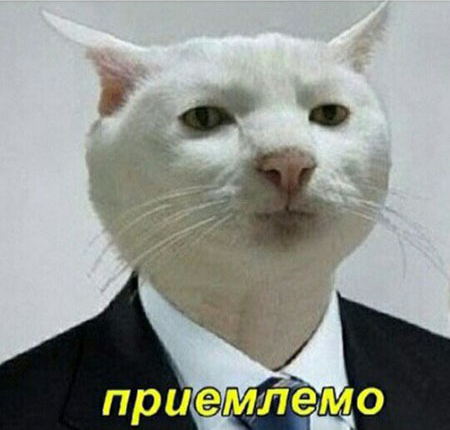